#Lord's Prayer Levenshtein

## Introduction

The "why" behind this project was to see the differences and similarities between different Romance languages. How similar were the words in terms of how they're spelled? As someone fluent in Spanish and proficient in Portuguese, I'd come to realize that the vocabulary across Romanace languages are often similar, with minor differences in spelling. For example, the word for "door" in Spanish is "puerta" and in Portuguese it's "porta". The words are written similarly, but with a difference in spelling. The "ue" in a Spanish word becomes an "o" in Portuguese, which is a pattern that is repeatedly seen when translating between the two languages. 

However, this isn't always the case, as two Romance languages might describe something using words derived from different sources in Latin, or using a word from another language. The word for "window" in Spanish is "ventana", but in Portuguese is "janela". In this case, "ventana" comes from Latin word for wind "ventus", since a window is a place where wind could come in. "Janela" comes from the diminutive Latin word for door, "janua", which is "januela" (https://bit.ly/2BAK5B8). There, instead of a window being seen as a place for wind, the concept of a window being a sort of "little door" is expressed. The two languages drew from different Latin words to express the concept of a window, which leads us to the difference in vocabulary today.

## Prayer

To try and quantify these differences, I decided to use the Lord's Prayer, a well-known prayer in the Christian religion. It's a prayer that Jesus taught his disciples as the way to pray. Even if you're not religious, if you grew up in an where Christianity is the dominant religion, you're probably heard it. The version in English is :

Our Father who art in heaven,
Hallowed be thy name.
Thy kingdom come.
Thy will be done
on earth as it is in heaven.
Give us this day our daily bread,
and forgive us our trespasses,
as we forgive those who trespass against us,
and lead us not into temptation,
but deliver us from evil.

Since this prayer is short, and has been translated across many languages, it's a good text to use for linguistic analysis. To get data I used the text of the prayer as seen on the Lord's Prayer's Wikipedia page of the following languages: Spanish, Portuguese, French, Italian, Catalan, Romanian, and Latin.

## Word selection

I first looked for the common nouns I saw in the English version of the text. They are: father, heaven, name, kingdom, will, earth, heaven, bread, trespasses, temptation, and evil. Next, I found the corresponding words in the texts of the previously mentioned languages. Finally, I took the "root" form of the noun of those words, removing any grammatical inflections (e.g., removing the "s" from the end of a plural word to make it singular).

## Calculating Levenshtein distance

To compare how similar to words were, I used to measure of Levenshtein distance. The Levenshtein distance between two words is the smallest number of single-character edits it takes to transform one word into another. For example, the distance between the word "cat" and "cot" would be one. You replace the letter "a" in "cat" with an "o" to make the word "cot". I calculated the Levenshtein distance for a word in one language with its corresponding word in the other six languages examined. For example, for the word for name in Spanish, "nombre", I found the Levenshtein distance between that in the word for name in Portuguese (nome), French (nom), and so on. To do this processing, I used the C# programming language.

# Processing output

Below is a sample of the Levenshtein distance results. There is a dataset with nine columns. There is a word, and a code representing the language of the word. The following seven columns represent the Levenshtein distances between the word and its counterparts in other languages. The -1 you see are filler values in the language column of a word's language, for when a word would be compared against itself.

In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

ReadExcel = pd.read_excel("output.xlsx")
df = DataFrame(ReadExcel)
print df.head()

       Word Language  spa  por  fra  ita  cat  ron  lat
0     padre      spa   -1    3    2    0    1    4    3
1     cielo      spa   -1    4    2    0    2    3    3
2    nombre      spa   -1    2    3    2    3    3    3
3     reino      spa   -1    0    3    1    2    3    3
4  voluntad      spa   -1    3    3    3    1    5    1


##Analysis

###Average Levenshtein distance

The bar chart shows the average Levenshtein distance for the words of each language, when compared against other languages in the set. What's notable here is the higher distance of the Romanian words. 

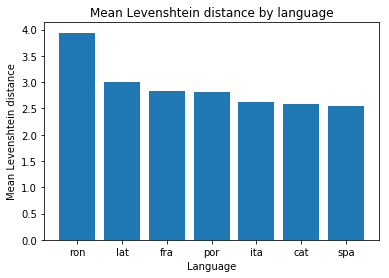

In [3]:
from __future__ import division


ReadExcel = pd.read_excel("output.xlsx")
df = DataFrame(ReadExcel)
Index = ["spa", "por", "fra", "ita", "cat", "ron", "lat"]
	
means = {}

for i in Index:
	data = df[df["Language"].str.contains(i)]
	n = 0
	sum = 0
	for row in data.iterrows():
		for j in range(2, 9):
			datum = row[1].values[j]
			if datum != -1:
				n+=1;
				sum+=datum;				
	avg = sum/n
	means[i] = avg
	
means = sorted(means.iteritems(), key=lambda (k,v): (v,k), reverse = True)
languages = []
distance = []
for i in means:
	languages.append(i[0])
	distance.append(i[1])
	
plt.bar(languages, distance)
plt.xlabel("Language")
plt.ylabel("Mean Levenshtein distance")
plt.title("Mean Levenshtein distance by language")
plt.show()

###Distance from Latin

This bar chart shows the mean distance of the words in a language group from their Latin equivalents. The bulk of the vocabulary in Romance languages is derived from Latin. There is a much higher distance for Romanian than with the other languages.

In [ ]:
ReadExcel = pd.read_excel("output.xlsx")
df = DataFrame(ReadExcel)
Index = ["spa", "por", "fra", "ita", "cat", "ron", "lat"]
	
means = {}

for i in Index:
	if i != "lat":
		data = df[df["Language"].str.contains(i)]
		n = 0
		sum = 0
		for row in data.iterrows():
			datum = row[1].values[8]
			n+=1;
			sum+=datum;								
		avg = sum/n
		means[i] = avg
means = sorted(means.iteritems(), key=lambda (k,v): (v,k), reverse = True)
languages = []
dist_from_lat = []
for i in means:
	languages.append(i[0])
	dist_from_lat.append(i[1])

plt.bar(languages, dist_from_lat)
plt.xlabel("Language")
plt.ylabel("Mean Levenshtein distance")
plt.title("Mean Levenshtein distance from Latin")
plt.show()

###Heatmap

In the second column from the right, for the Romanian words, the shades of the cells are a bit lighter than the others. This shows a higher Levenshtein distance between Romanian words, and their counterparts in the other languages looked at.

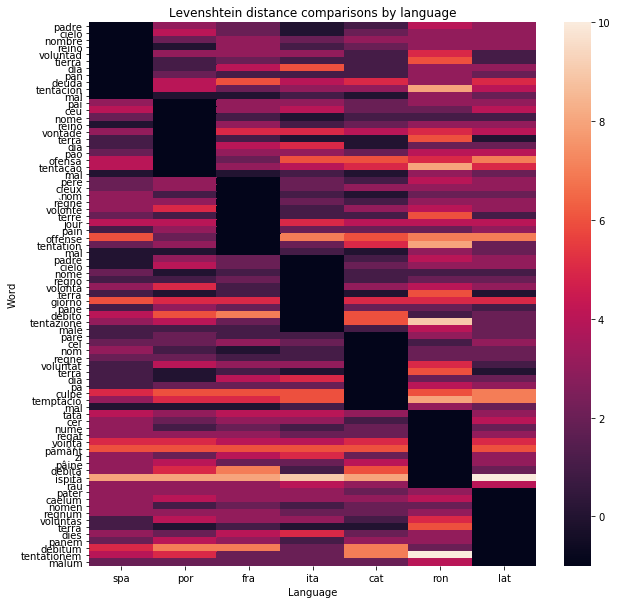

In [6]:
ReadExcel = pd.read_excel("output.xlsx")
df = DataFrame(ReadExcel)
Index = ["spa", "por", "fra", "ita", "cat", "ron", "lat"]
Cols = df["Word"].tolist()
df = df.drop(columns = ["Word", "Language"])
df2 = pd.DataFrame(df, index=Index, columns=Cols)
dims = (10, 10)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(df, ax=ax, yticklabels=Cols)
plt.xlabel("Language")
plt.ylabel("Word")
plt.title("Levenshtein distance comparisons by language")
plt.show()

##Conclusions

You can see the impact of isolation on the development of Romanian. The other Romance languages looked at are based in Western Europe and are linked together via regional dialects. This led to a sharing of language. Romanian is in Eastern Europe, and surrounded by languages in the Slavic family. This isolation led to a divergence in the language, as their language was influenced by their neighbors.

This project wasn't meant to be a full linguistic analysis of the similarities of languages, rather to use Levenshtein distance as a proxy for similarity of a small group of nouns. A language's history, syntax, grammar, pronunciation, and writing are some of the other factors that unite and differentiate languages, and to truly say something like French is farther away from Latin than Italian, you would have to take into account all of those other factors.